In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

# Data Proprocessing

In [2]:
data = pd.read_csv("corona_dataset.csv")
data.head()

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [3]:
data.describe()

people_ID      Children      cases/1M     Deaths/1M           Age  \
count  10714.000000  10403.000000  10714.000000  10714.000000  10714.000000   
mean   10084.893784      1.062770      3.285888      0.523241     42.083722   
std     7108.663645      0.818222      2.721274      0.854303     15.323397   
min        1.000000      0.000000      1.000000      0.000000     16.000000   
25%     2679.250000      0.000000      2.000000      0.000000     29.000000   
50%    10003.500000      1.000000      2.000000      0.000000     42.000000   
75%    15141.750000      2.000000      4.000000      1.000000     55.000000   
max    22695.000000      2.000000      8.000000      2.000000     68.000000   

         Coma score     Diuresis    Platelets           HBB      d-dimer  \
count  10714.000000  9998.000000  9790.000000  10698.000000  9600.000000   
mean       9.013067   278.806261    87.795812    116.170967   275.292292   
std        3.714970    97.985526    41.851103     55.178811    43.669692   
min        3.000000   110.000000    15.000000     20.000000   200.000000   
25%        6.000000   194.000000    52.000000     68.000000   237.000000   
50%        9.000000   276.000000    88.000000    117.000000   276.000000   
75%       12.000000   364.000000   124.000000    165.000000   313.000000   
max       15.000000   450.000000   160.000000    210.000000   350.000000   

        Heart rate  HDL cholesterol  Charlson Index  Blood Glucose  \
count  9600.000000     10679.000000    10714.000000   10714.000000   
mean     74.847396        52.632737       20.028094       5.015027   
std      14.869104        10.434293       11.828445       1.399770   
min      50.000000        35.000000        0.000000       3.000000   
25%      62.000000        44.000000       10.000000       4.000000   
50%      75.000000        53.000000       20.000000       5.000000   
75%      88.000000        62.000000       30.000000       6.000000   
max     100.000000        70.000000       40.000000       7.000000   

          Insurance        salary     FT/month   Infect_Prob  
count  9.624000e+03  1.071400e+04  9991.000000  10714.000000  
mean   2.644919e+06  1.304713e+06     1.004604     52.280680  
std    1.383346e+06  6.075947e+05     0.815257     10.674667  
min    3.000000e+05  3.000000e+05     0.000000     29.289600  
25%    1.400000e+06  8.000000e+05     0.000000     47.277426  
50%    2.600000e+06  1.300000e+06     1.000000     49.008389  
75%    3.800000e+06  1.800000e+06     2.000000     52.762313  
max    5.000000e+06  2.300000e+06     2.000000     97.632000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Gender                  10714 non-null  object 
 3   Designation             10714 non-null  object 
 4   Name                    10694 non-null  object 
 5   Married                 10714 non-null  object 
 6   Children                10403 non-null  float64
 7   Occupation              9967 non-null   object 
 8   Mode_transport          10711 non-null  object 
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10488 non-null  object 
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

In [5]:
data.isna().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

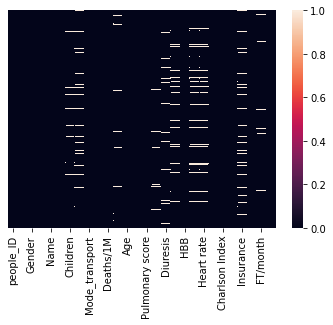

In [6]:
sns.heatmap(data.isnull(), yticklabels= False)

In [7]:
# Filling the missing values of all numerical features with repective mean
data1 = data.fillna(data.mean())

In [8]:
data1.isna().sum()

people_ID                   0
Region                      0
Gender                      0
Designation                 0
Name                       20
Married                     0
Children                    0
Occupation                747
Mode_transport              3
cases/1M                    0
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure     97
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
dtype: int64

In [9]:
data1['cardiological pressure'].value_counts()

Normal      2681
Stage-01    2657
Elevated    2641
Stage-02    2638
Name: cardiological pressure, dtype: int64

In [10]:
grouped = data1.groupby(['Gender', 'cardiological pressure'])
grouped.size()

Gender  cardiological pressure
Female  Elevated                  1339
        Normal                    1355
        Stage-01                  1374
        Stage-02                  1309
Male    Elevated                  1302
        Normal                    1326
        Stage-01                  1283
        Stage-02                  1329
dtype: int64

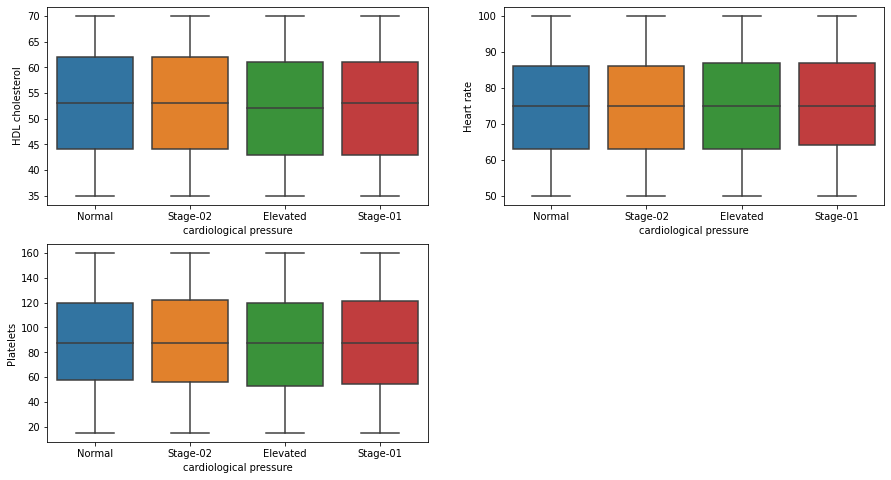

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x='cardiological pressure', y = 'HDL cholesterol', data = data1)
plt.subplot(2,2,2)
sns.boxplot(x='cardiological pressure', y = 'Heart rate', data = data1)
plt.subplot(2,2,3)
sns.boxplot(x='cardiological pressure', y = 'Platelets', data = data1)

### Oberservation
Since there is no related features to be used for imputing values, we are are imputing the missing values in `cardiological pressure` by giving equal probability for the class within cardiological pressure.

In [12]:
def fillCardioVal(col):
    if pd.isnull(col):
       return np.random.choice(data1['cardiological pressure'].dropna().unique())
    else:
        return col

data1['cardiological pressure'] = data1['cardiological pressure'].apply(fillCardioVal)

In [13]:
data1['cardiological pressure'].value_counts()

Normal      2702
Stage-01    2676
Elevated    2672
Stage-02    2664
Name: cardiological pressure, dtype: int64

In [14]:
data1.isna().sum()

people_ID                   0
Region                      0
Gender                      0
Designation                 0
Name                       20
Married                     0
Children                    0
Occupation                747
Mode_transport              3
cases/1M                    0
Deaths/1M                   0
comorbidity               226
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure      0
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
dtype: int64

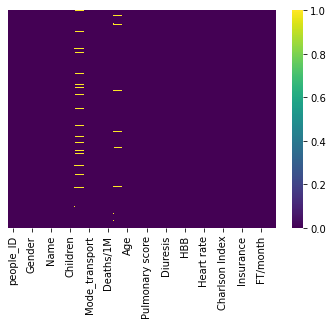

In [15]:
sns.heatmap(data1.isnull(), yticklabels= False, cmap = 'viridis')

In [16]:
data1['comorbidity'].value_counts()

Hypertension              2642
None                      2637
Diabetes                  2614
Coronary Heart Disease    2595
Name: comorbidity, dtype: int64

In [17]:
grouped = data1.groupby(['Gender', 'comorbidity'])
grouped.size()

Gender  comorbidity           
Female  Coronary Heart Disease    1302
        Diabetes                  1290
        Hypertension              1362
        None                      1353
Male    Coronary Heart Disease    1293
        Diabetes                  1324
        Hypertension              1280
        None                      1284
dtype: int64

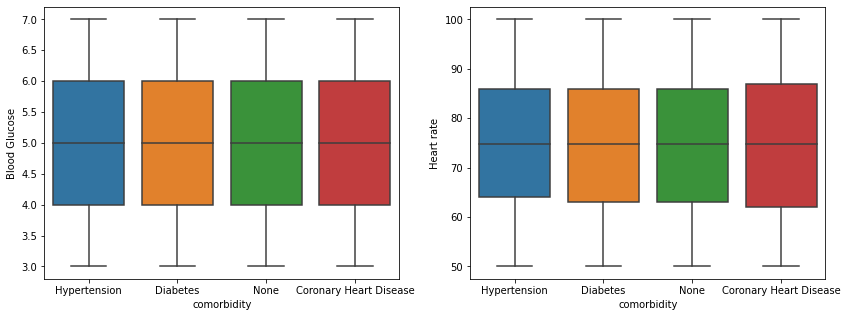

In [18]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.boxplot(x='comorbidity', y = 'Blood Glucose', data = data1)
plt.subplot(1,2,2)
sns.boxplot(x='comorbidity', y = 'Heart rate', data = data1)

### Oberservation
Since there is no related features to be used for imputing values, we are are imputing the missing values in `Comorbidity` by giving equal probability for the class within comorbidity.

In [19]:
def fillComorbVal(col):
    if pd.isnull(col):
       return np.random.choice(data1['comorbidity'].dropna().unique())
    else:
        return col

data1['comorbidity'] = data1['comorbidity'].apply(fillComorbVal)

In [20]:
data1['comorbidity'].value_counts()

Hypertension              2698
None                      2696
Diabetes                  2677
Coronary Heart Disease    2643
Name: comorbidity, dtype: int64

In [21]:
data1.isna().sum()

people_ID                   0
Region                      0
Gender                      0
Designation                 0
Name                       20
Married                     0
Children                    0
Occupation                747
Mode_transport              3
cases/1M                    0
Deaths/1M                   0
comorbidity                 0
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure      0
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
dtype: int64

In [22]:
data1['Mode_transport'].value_counts()

Public    3588
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64

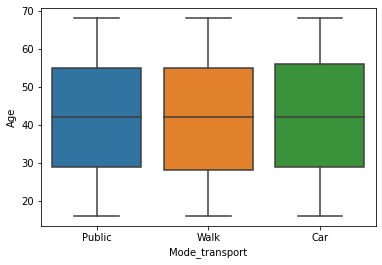

In [23]:
sns.boxplot(x='Mode_transport', y = 'Age', data = data1)

In [24]:
# Since there is only 3 missing values, we impute by giving more frequent (mode) category
data1['Mode_transport'].fillna(data1['Mode_transport'].mode()[0], inplace = True)

In [25]:
data1.isna().sum()

people_ID                   0
Region                      0
Gender                      0
Designation                 0
Name                       20
Married                     0
Children                    0
Occupation                747
Mode_transport              0
cases/1M                    0
Deaths/1M                   0
comorbidity                 0
Age                         0
Coma score                  0
Pulmonary score             0
cardiological pressure      0
Diuresis                    0
Platelets                   0
HBB                         0
d-dimer                     0
Heart rate                  0
HDL cholesterol             0
Charlson Index              0
Blood Glucose               0
Insurance                   0
salary                      0
FT/month                    0
Infect_Prob                 0
dtype: int64

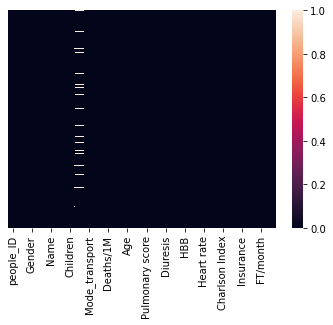

In [26]:
sns.heatmap(data1.isnull(), yticklabels= False)

### Correlation b/w `Diuresis` and `Infection Probability`

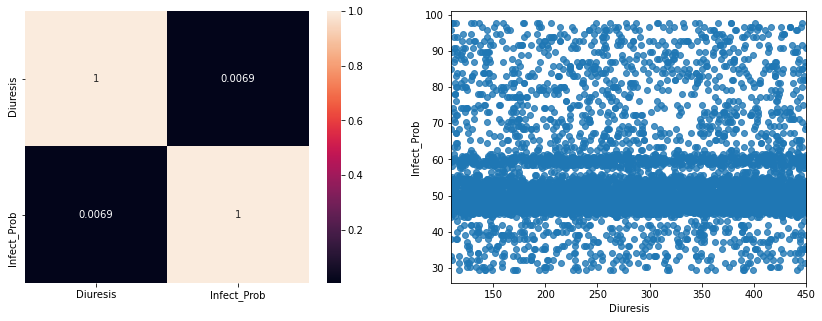

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.heatmap(data1[['Diuresis','Infect_Prob']].corr(), annot = True)
plt.subplot(1,2,2)
sns.regplot(x = 'Diuresis', y = 'Infect_Prob', data = data1)

In [28]:
scipy.stats.pearsonr(data1['Diuresis'], data1['Infect_Prob'])

(0.00685054702256349, 0.4783150973231871)

### Observation
The correlation coefficient is 0.00685 which is not significantly higher than zero (P value = 0.4783).
Hence it is concluded that there is no correation between `Diuresis` and `Infection Probability`

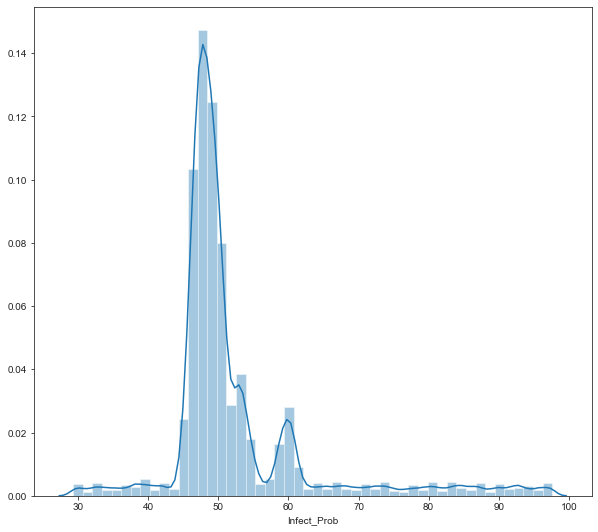

In [29]:
plt.figure(figsize=(10,9))
sns.set_style("ticks")
sns.distplot(data1['Infect_Prob'])

Most of the data is having around 50% chance of infection 

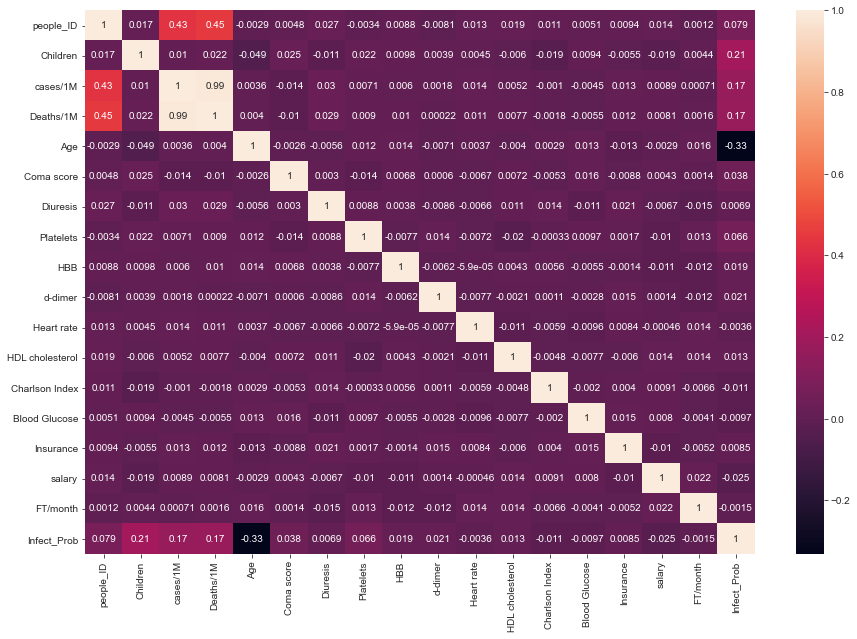

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(data1.corr(), annot = True)

In [31]:
data1['Occupation'].value_counts()

Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
Name: Occupation, dtype: int64

<Figure size 10800x8640 with 0 Axes>

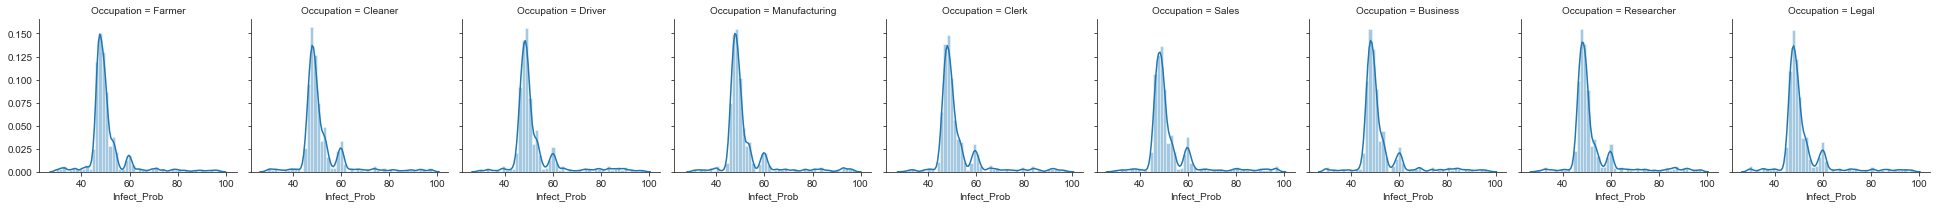

In [32]:
plt.figure(figsize=(150,120))
sns.FacetGrid(data1, col = 'Occupation').map(sns.distplot, 'Infect_Prob')

(0.0, 70.0)

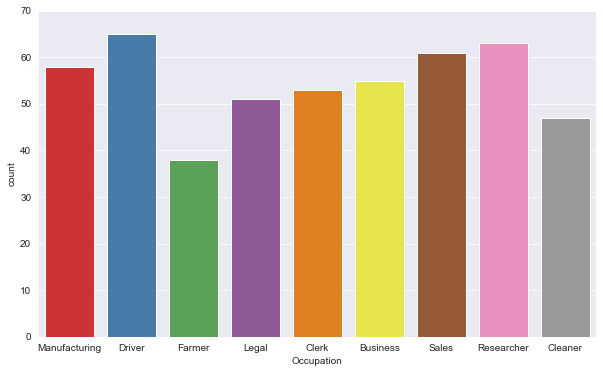

In [33]:
'''

No of cases for different occupation.
Cases is defined as Infection probabilty greater than 0.75(75%).

'''
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x = 'Occupation', data = data1[data1['Infect_Prob'] > 75], palette='Set1')
plt.ylim(0,70)

### Observation
The most reported(infected) cases are people who work as Drivers.

In [34]:
predata = data1.drop(['Occupation', 'Name', 'Designation','people_ID'], axis = 1)
predata.head()

Region  Gender Married  Children Mode_transport  cases/1M  Deaths/1M  \
0  Bhubaneshwar  Female     YES       1.0         Public         2          0   
1  Bhubaneshwar  Female     YES       2.0           Walk         2          0   
2  Bhubaneshwar  Female      NO       1.0         Public         2          0   
3  Bhubaneshwar  Female     YES       1.0            Car         2          0   
4  Bhubaneshwar  Female      NO       2.0            Car         2          0   

              comorbidity  Age  Coma score  ...    HBB d-dimer  Heart rate  \
0            Hypertension   68           8  ...   93.0   233.0        82.0   
1                Diabetes   64          15  ...   56.0   328.0        89.0   
2                    None   19          13  ...  137.0   213.0        77.0   
3  Coronary Heart Disease   33           9  ...  167.0   275.0        64.0   
4                Diabetes   23           7  ...  153.0   331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose  Insurance   salary  \
0             58.0              27              7  3600000.0  1300000   
1             68.0               5              6  1600000.0   400000   
2             43.0              40              6  3400000.0   900000   
3             60.0              27              7   700000.0  2300000   
4             64.0              32              7  3200000.0  1100000   

   FT/month  Infect_Prob  
0       2.0    49.135010  
1       1.0    51.147880  
2       1.0    73.224000  
3       1.0    48.779225  
4       1.0    87.868800  

[5 rows x 24 columns]

In [35]:
catdata = predata.select_dtypes(include='O')
catdata.head()

Region  Gender Married Mode_transport             comorbidity  \
0  Bhubaneshwar  Female     YES         Public            Hypertension   
1  Bhubaneshwar  Female     YES           Walk                Diabetes   
2  Bhubaneshwar  Female      NO         Public                    None   
3  Bhubaneshwar  Female     YES            Car  Coronary Heart Disease   
4  Bhubaneshwar  Female      NO            Car                Diabetes   

  Pulmonary score cardiological pressure  
0            <400                 Normal  
1            <100               Stage-02  
2            <300               Elevated  
3            <200               Stage-01  
4            <400                 Normal

In [36]:
predata.to_csv("predata.csv", index = False)

In [37]:
predata = pd.read_csv("predata.csv")

In [38]:
# Get one hot encoding of columns Gender
one_hot = pd.get_dummies(predata['Gender'], drop_first=True)
predata = predata.drop('Gender',axis = 1)
predata = predata.join(one_hot)
predata.head()

Region Married  Children Mode_transport  cases/1M  Deaths/1M  \
0  Bhubaneshwar     YES       1.0         Public         2          0   
1  Bhubaneshwar     YES       2.0           Walk         2          0   
2  Bhubaneshwar      NO       1.0         Public         2          0   
3  Bhubaneshwar     YES       1.0            Car         2          0   
4  Bhubaneshwar      NO       2.0            Car         2          0   

              comorbidity  Age  Coma score Pulmonary score  ... d-dimer  \
0            Hypertension   68           8            <400  ...   233.0   
1                Diabetes   64          15            <100  ...   328.0   
2                    None   19          13            <300  ...   213.0   
3  Coronary Heart Disease   33           9            <200  ...   275.0   
4                Diabetes   23           7            <400  ...   331.0   

   Heart rate  HDL cholesterol  Charlson Index  Blood Glucose  Insurance  \
0        82.0             58.0              27              7  3600000.0   
1        89.0             68.0               5              6  1600000.0   
2        77.0             43.0              40              6  3400000.0   
3        64.0             60.0              27              7   700000.0   
4        71.0             64.0              32              7  3200000.0   

    salary  FT/month  Infect_Prob  Male  
0  1300000       2.0    49.135010     0  
1   400000       1.0    51.147880     0  
2   900000       1.0    73.224000     0  
3  2300000       1.0    48.779225     0  
4  1100000       1.0    87.868800     0  

[5 rows x 24 columns]

In [39]:
predata['Married'] = predata['Married'].map({'NO': 0, 'YES': 1})

In [40]:
# Get one hot encoding of columns Region
one_hot = pd.get_dummies(predata['Region'])
predata = predata.drop('Region',axis = 1)
predata = predata.join(one_hot)
predata.head()

Married  Children Mode_transport  cases/1M  Deaths/1M  \
0        1       1.0         Public         2          0   
1        1       2.0           Walk         2          0   
2        0       1.0         Public         2          0   
3        1       1.0            Car         2          0   
4        0       2.0            Car         2          0   

              comorbidity  Age  Coma score Pulmonary score  \
0            Hypertension   68           8            <400   
1                Diabetes   64          15            <100   
2                    None   19          13            <300   
3  Coronary Heart Disease   33           9            <200   
4                Diabetes   23           7            <400   

  cardiological pressure  ...  Insurance   salary  FT/month  Infect_Prob  \
0                 Normal  ...  3600000.0  1300000       2.0    49.135010   
1               Stage-02  ...  1600000.0   400000       1.0    51.147880   
2               Elevated  ...  3400000.0   900000       1.0    73.224000   
3               Stage-01  ...   700000.0  2300000       1.0    48.779225   
4                 Normal  ...  3200000.0  1100000       1.0    87.868800   

   Male  Bengaluru  Bhubaneshwar  Chandigarh  Chennai  Delhi  
0     0          0             1           0        0      0  
1     0          0             1           0        0      0  
2     0          0             1           0        0      0  
3     0          0             1           0        0      0  
4     0          0             1           0        0      0  

[5 rows x 28 columns]

In [41]:
# Get one hot encoding of columns comorbidity
one_hot = pd.get_dummies(predata['comorbidity'])
predata = predata.drop('comorbidity',axis = 1)
predata = predata.join(one_hot)
predata.head()

Married  Children Mode_transport  cases/1M  Deaths/1M  Age  Coma score  \
0        1       1.0         Public         2          0   68           8   
1        1       2.0           Walk         2          0   64          15   
2        0       1.0         Public         2          0   19          13   
3        1       1.0            Car         2          0   33           9   
4        0       2.0            Car         2          0   23           7   

  Pulmonary score cardiological pressure    Diuresis  ...  Male  Bengaluru  \
0            <400                 Normal  441.000000  ...     0          0   
1            <100               Stage-02  278.806261  ...     0          0   
2            <300               Elevated  416.000000  ...     0          0   
3            <200               Stage-01  410.000000  ...     0          0   
4            <400                 Normal  390.000000  ...     0          0   

   Bhubaneshwar  Chandigarh  Chennai  Delhi  Coronary Heart Disease  Diabetes  \
0             1           0        0      0                       0         0   
1             1           0        0      0                       0         1   
2             1           0        0      0                       0         0   
3             1           0        0      0                       1         0   
4             1           0        0      0                       0         1   

   Hypertension  None  
0             1     0  
1             0     0  
2             0     1  
3             0     0  
4             0     0  

[5 rows x 31 columns]

In [42]:
# Get one hot encoding of columns mode of transport
one_hot = pd.get_dummies(predata['Mode_transport'])
predata = predata.drop('Mode_transport',axis = 1)
predata = predata.join(one_hot)
predata.head()

Married  Children  cases/1M  Deaths/1M  Age  Coma score Pulmonary score  \
0        1       1.0         2          0   68           8            <400   
1        1       2.0         2          0   64          15            <100   
2        0       1.0         2          0   19          13            <300   
3        1       1.0         2          0   33           9            <200   
4        0       2.0         2          0   23           7            <400   

  cardiological pressure    Diuresis  Platelets  ...  Chandigarh  Chennai  \
0                 Normal  441.000000      154.0  ...           0        0   
1               Stage-02  278.806261      121.0  ...           0        0   
2               Elevated  416.000000      124.0  ...           0        0   
3               Stage-01  410.000000       98.0  ...           0        0   
4                 Normal  390.000000       21.0  ...           0        0   

   Delhi  Coronary Heart Disease  Diabetes  Hypertension  None  Car  Public  \
0      0                       0         0             1     0    0       1   
1      0                       0         1             0     0    0       0   
2      0                       0         0             0     1    0       1   
3      0                       1         0             0     0    1       0   
4      0                       0         1             0     0    1       0   

   Walk  
0     0  
1     1  
2     0  
3     0  
4     0  

[5 rows x 33 columns]

In [43]:
# Label Encoding
predata['cardiological pressure'] = predata['cardiological pressure'].map({'Normal':0, 'Elevated':1,
                                                                          'Stage-01':2, 'Stage-02':3})

predata['Pulmonary score'] = predata['Pulmonary score'].map({'<100':0, '<200':1, '<300':2, '<400':3})

In [44]:
predata.head()

Married  Children  cases/1M  Deaths/1M  Age  Coma score  Pulmonary score  \
0        1       1.0         2          0   68           8                3   
1        1       2.0         2          0   64          15                0   
2        0       1.0         2          0   19          13                2   
3        1       1.0         2          0   33           9                1   
4        0       2.0         2          0   23           7                3   

   cardiological pressure    Diuresis  Platelets  ...  Chandigarh  Chennai  \
0                       0  441.000000      154.0  ...           0        0   
1                       3  278.806261      121.0  ...           0        0   
2                       1  416.000000      124.0  ...           0        0   
3                       2  410.000000       98.0  ...           0        0   
4                       0  390.000000       21.0  ...           0        0   

   Delhi  Coronary Heart Disease  Diabetes  Hypertension  None  Car  Public  \
0      0                       0         0             1     0    0       1   
1      0                       0         1             0     0    0       0   
2      0                       0         0             0     1    0       1   
3      0                       1         0             0     0    1       0   
4      0                       0         1             0     0    1       0   

   Walk  
0     0  
1     1  
2     0  
3     0  
4     0  

[5 rows x 33 columns]

In [45]:
predata.to_csv("preprocessed_data.csv",index=False)
data = pd.read_csv("preprocessed_data.csv")

In [46]:
pd.set_option('display.max_columns', None)
data.head()

Married  Children  cases/1M  Deaths/1M  Age  Coma score  Pulmonary score  \
0        1       1.0         2          0   68           8                3   
1        1       2.0         2          0   64          15                0   
2        0       1.0         2          0   19          13                2   
3        1       1.0         2          0   33           9                1   
4        0       2.0         2          0   23           7                3   

   cardiological pressure    Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0                       0  441.000000      154.0   93.0    233.0        82.0   
1                       3  278.806261      121.0   56.0    328.0        89.0   
2                       1  416.000000      124.0  137.0    213.0        77.0   
3                       2  410.000000       98.0  167.0    275.0        64.0   
4                       0  390.000000       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose  Insurance   salary  \
0             58.0              27              7  3600000.0  1300000   
1             68.0               5              6  1600000.0   400000   
2             43.0              40              6  3400000.0   900000   
3             60.0              27              7   700000.0  2300000   
4             64.0              32              7  3200000.0  1100000   

   FT/month  Infect_Prob  Male  Bengaluru  Bhubaneshwar  Chandigarh  Chennai  \
0       2.0    49.135010     0          0             1           0        0   
1       1.0    51.147880     0          0             1           0        0   
2       1.0    73.224000     0          0             1           0        0   
3       1.0    48.779225     0          0             1           0        0   
4       1.0    87.868800     0          0             1           0        0   

   Delhi  Coronary Heart Disease  Diabetes  Hypertension  None  Car  Public  \
0      0                       0         0             1     0    0       1   
1      0                       0         1             0     0    0       0   
2      0                       0         0             0     1    0       1   
3      0                       1         0             0     0    1       0   
4      0                       0         1             0     0    1       0   

   Walk  
0     0  
1     1  
2     0  
3     0  
4     0

In [47]:
""" separating features and target """

X = data.drop(['Infect_Prob'], axis=1)
Y = data['Infect_Prob']

In [48]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y)

print("Training Size : ",train_X.shape)
print("Testing Size : ",test_X.shape)

Training Size :  (8035, 32)
Testing Size :  (2679, 32)


### Regression to predict the probability of Corona Infection

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [50]:
regressor.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Performance evaluation

In [51]:
import math
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

y_pred = regressor.predict(test_X)
print("Score = ", regressor.score(test_X, test_Y))
print("Root Mean Square Error = ",rmse(y_pred,test_Y))

Score =  0.2867403287532774
Root Mean Square Error =  9.403950248999122


Feature ranking:
1. feature 4 (0.277134)
2. feature 1 (0.061724)
3. feature 11 (0.059568)
4. feature 10 (0.058922)
5. feature 9 (0.057015)
6. feature 8 (0.052854)
7. feature 12 (0.048146)
8. feature 14 (0.047270)
9. feature 13 (0.046474)
10. feature 17 (0.043380)
11. feature 16 (0.042076)
12. feature 5 (0.034389)
13. feature 2 (0.027842)
14. feature 3 (0.020593)
15. feature 15 (0.017887)
16. feature 18 (0.012687)
17. feature 6 (0.010027)
18. feature 7 (0.009135)
19. feature 19 (0.007243)
20. feature 27 (0.006438)
21. feature 31 (0.006139)
22. feature 26 (0.006110)
23. feature 25 (0.005776)
24. feature 24 (0.005759)
25. feature 30 (0.005443)
26. feature 21 (0.005390)
27. feature 29 (0.005300)
28. feature 22 (0.005257)
29. feature 20 (0.004825)
30. feature 28 (0.004756)
31. feature 23 (0.002947)
32. feature 0 (0.001493)


(-1.0, 32.0)

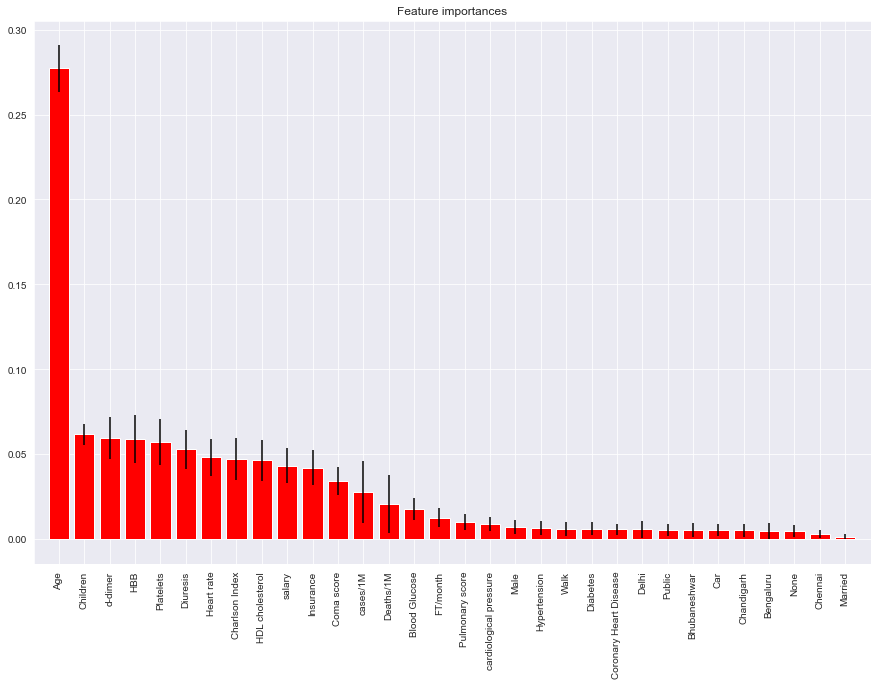

In [52]:
features = train_X.columns
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(train_X.columns, importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, train_X.shape[1]])